<a href="https://colab.research.google.com/github/NaydelinAidee/Simulaci-nI/blob/main/actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

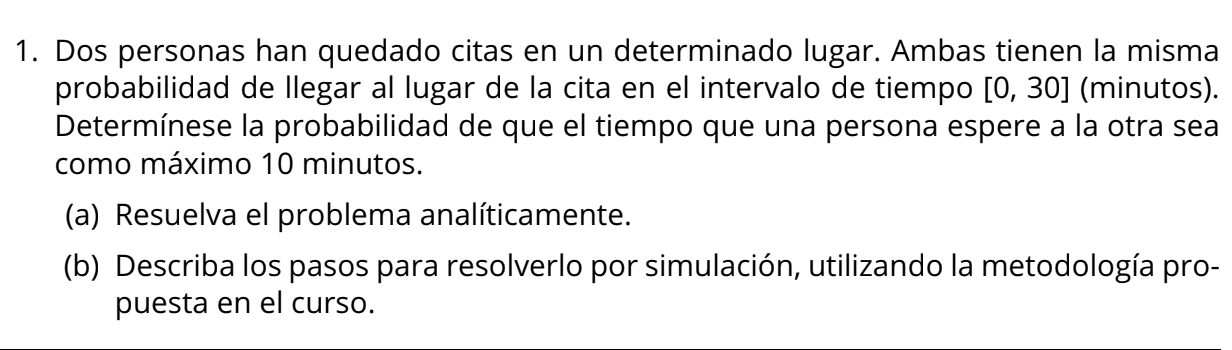

NAYDELIN AIDEE CARCAMO HERNANDEZ

# Paso 1.Identificar Variables

Veamos que necesitamos dos variables aleatorias que las definiremos como:
*   X: Tiempo de llegada de la Persona 1.
*   Y: Tiempo de llegada de la Persona 2.

Ademas necesitamos saber cual es el tiempo que espera una persona a otra el cual podemos alcular como:

$$∣X-Y∣$$
obviamente lo calculamos en valor abusoluto porque no hay tiempos de espera negativos.

# 2. Determine la distribución de probabilidad


-Veamos que tanto X como Y tienen una distribución uniforme continua en [0,30] ya que  caulquier persona tiene la misma probabilidad de llegar en cualquier momento del intervalo.

-Por otro lado ∣X-Y∣ sigue una distribución triangular [0,30].

# 3.Modelar las variables aleatorias

Definimos nuestras librerias

In [5]:
import numpy as np
import matplotlib.pyplot as plt

	•	Se define n como el número de simulaciones.
	•	Esto significa que se van a generar 100,000 pares de tiempos de llegada.


In [6]:
n = 100000  #Número de simulaciones

	•	Se define i como el valor máximo del intervalo de tiempo de llegada.
	•	Las llegadas de ambas personas estarán en el intervalo [0, 30] minutos.

In [7]:
i = 30  # Intervalo [0, 30] minutos

	•	Define el límite de espera: queremos ver cuántas veces la diferencia entre llegadas es menor o igual a 10 minutos.

In [8]:
espera = 10  # Tiempo de espera máximo permitido

	•	Genera n valores aleatorios uniformes entre 0 e i (es decir, 0 a 30) para:
	•	X: tiempos de llegada de la primera persona.
	•	Y: tiempos de llegada de la segunda persona.
	•	Así, se simulan 100,000 llegadas aleatorias para cada persona.


In [9]:
X = np.random.uniform(0, i, n)
Y = np.random.uniform(0, i, n)

	•	Calcula la diferencia de llegada entre cada par de personas.
	•	np.abs() devuelve el valor absoluto, para que no importe quién llegó primero.
	•	El resultado es un arreglo con 100,000 tiempos de espera absolutos.

In [10]:
t_esp = np.abs(X - Y)

# 4. Definimos el modelo del sistema y los objetivos de la simulación

Necesitamos  hallar  P(∣X-Y∣≤10).
Comparar la probabilidad simulada con el resultado teórico (5/9≈0.5556).
Modelo del sistema:
Dos llegadas independientes y uniformemente distribuidas en [0,30].
El sistema "falla" si ∣X-Y∣>10.

# 5.Diseñamos el experimento

	•	t_esp <= espera:
Crea un arreglo de valores booleanos (True o False) indicando si el tiempo de espera es menor o igual a 10.


	•	np.mean(...):
Calcula el promedio de los True, que se cuentan como 1, y False como 0.

Esto da como resultado una estimación de la probabilidad de que dos personas se esperen 10 minutos o menos

In [11]:
#Objetivo: Estimar P(|X - Y| <= 10)
prob_estimada = np.mean(t_esp <= espera)

#(5/9 ≈ 0.5556)
prob_teorica = 5 / 9

# 6. Repita el experimento veces

-Ley de los Grandes Números: A mayor n, la estimación converge al valor teórico.



-Teorema del Límite Central: El error sigue una distribución normal con varianza decreciente


imulación Monte Carlo

Probabilidad estimada: 0.5548
Probabilidad teórica:  0.5556
Error :        0.1270%


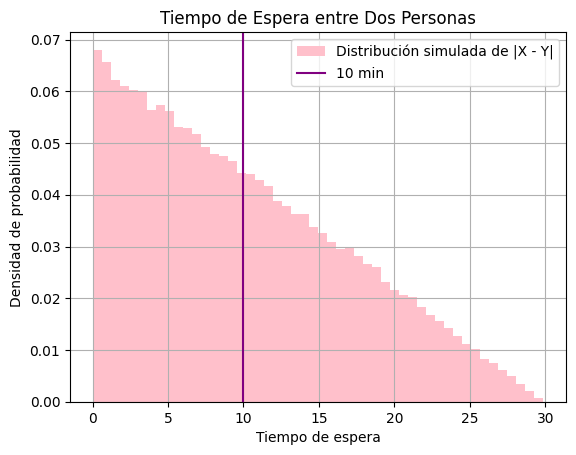

In [14]:
print("\nimulación Monte Carlo\n")
print(f"Probabilidad estimada: {prob_estimada:.4f}")
print(f"Probabilidad teórica:  {prob_teorica:.4f}")
print(f"Error :        {np.abs(prob_estimada - prob_teorica)/prob_teorica * 100:.4f}%")

#Histograma
plt.hist(t_esp, bins=50, density=True, color="pink",
         label="Distribución simulada de |X - Y|")
plt.axvline(espera, color='purple', label=f"{espera} min")
plt.xlabel("Tiempo de espera")
plt.ylabel("Densidad de probabilidad")
plt.title("Tiempo de Espera entre Dos Personas")
plt.legend()
plt.grid()
plt.show()
